In [1]:
import Pkg
Pkg.add("Eirene")
Pkg.add("WebIO")
Pkg.add("Plots")

   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using Eirene
using WebIO
using Plots
using LinearAlgebra

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-12485748894921473906\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5123805832120863269\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-12485748894921473906\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Мне пришлось написать самому код рисования графиков, так как в Eirene строятся интерактивные графики. Чтобы их отобразить, надо запускать код, поэтому я рисую статические графики.

In [83]:
function plotpersistencediagram(C, dims)
    gr()
    p = plot()
    x₀ = Inf
    x₁ = 0
    for d in dims
        A = barcode(C, dim=d)
        plot!(p, A[:, 1], A[:, 2], seriestype = :scatter, label = "dim = $d")
        x₀ = min(x₀, minimum(A))
        x₁ = max(x₁, maximum(A))
    end
    plot!(p, [x₀, x₁], [x₀, x₁], label = "")
    display(p)
end

plotpersistencediagram (generic function with 1 method)

In [3]:
function sphere(d) # Равномерная случайная точка на d-сфере
    p = randn(d)
    d = LinearAlgebra.norm(p)
    p ./ d
end
;

Нарисуем несколько точек

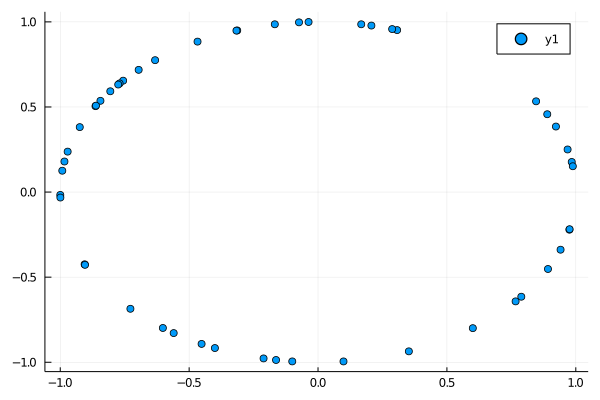

In [4]:
pts = [tuple(sphere(2)...) for i=1:50]
plot(pts, seriestype = :scatter)

In [5]:
sphere_pts = reduce(hcat, [sphere(3) for _=1:100])
sphere_res = eirene(sphere_pts, model = "pc", maxdim=3)

Dict{String,Any} with 12 entries:
  "symmat"   => [4735 4614 … 0 0; 4614 4735 … 78 0; … ; 0 78 … 4735 4628; 0 0 ……
  "maxnz"    => [0, 2159, 75584, 1276886, 18824391, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  92, 93, 94, 95, 96, 97, 98,…
  "cyclerep" => [Array{Int64,1}[], [[100, 98], [5, 6], [99, 95], [9, 12], [67, …
  "phi"      => [Int64[], [4733, 383, 4723, 747, 4108, 4710, 4546, 4716, 4702, …
  "plo"      => [Int64[], [98, 6, 95, 12, 65, 93, 81, 94, 92, 89  …  51, 96, 30…
  "ocg2rad"  => [1.95405, 1.95377, 1.95322, 1.95254, 1.95229, 1.95219, 1.95205,…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  91, 92, 93, 94, 95, 96, 97,…
  "nvl2ovl"  => [90, 33, 53, 73, 11, 61, 9, 42, 63, 47  …  88, 80, 1, 56, 51, 7…
  "input"    => Dict{String,Any}("genera"=>[-0.30083 -0.129194 … 0.0412839 -0.2…
  "tid"      => [Int64[], [98, 6, 95, 12, 65, 93, 81, 94, 92, 89  …  96, 30, 85…
  "grain"    => [[4735, 4735, 4735, 4735, 4735, 4735, 4735, 4735, 4735, 4735  ……

Видно, что все классы 1-мерных гомологий живут недолго, что и ожидаемо, так как их у 3-мерной сферы нет. Для сфер большей размерности посчитать не получилось, так как либо гомологии не находятся, либо слишком долго считается и требует очень много памяти.

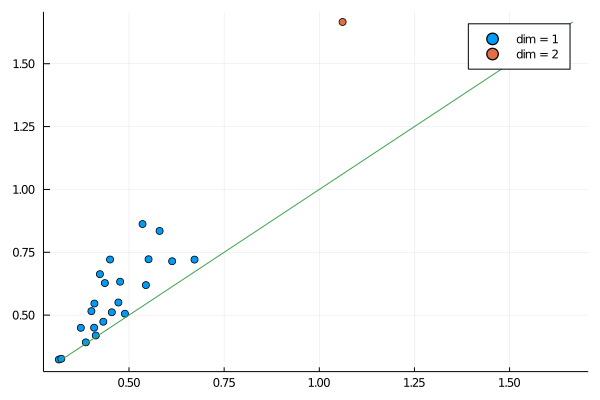

In [64]:
plotpersistencediagram(sphere_res,1:2)

Для нульмерных ничего особо интересного

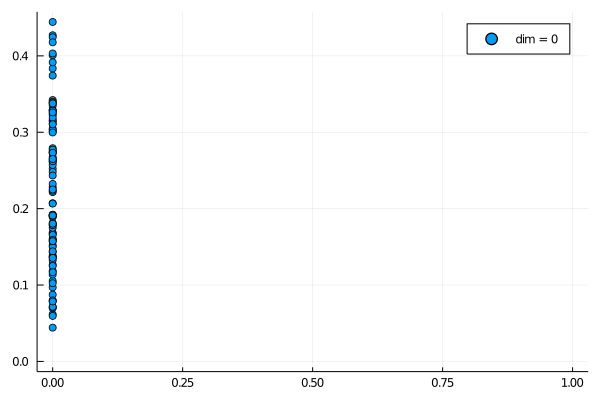

In [84]:
plotpersistencediagram(sphere_res,0)

А для двухмерных гомологий есть ровно один класс.

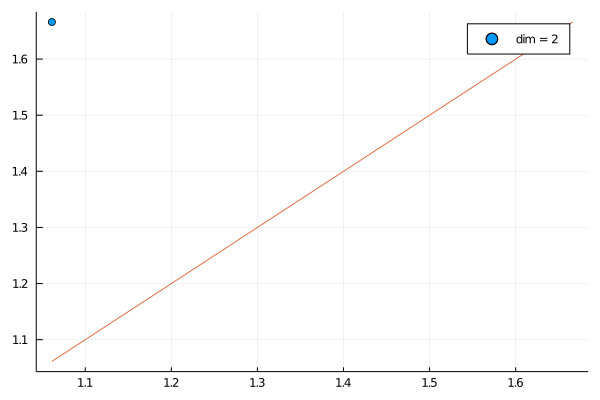

In [85]:
plotpersistencediagram(sphere_res,2)

Сгенерируем точки на торе, построенным с помощью декартового произведения нескольких $S^1$. Тут я просто беру равномерно точку из каждой сферы. К сожалению, я здесь ничего не могу сказать про распределение точек на самом торе.

In [9]:
gen_product(k) = vcat(collect(collect(sphere(2)) for i=1:k)...)

th1(cnt) = hcat([gen_product(1) for i=1:cnt]...)
th2(cnt) = hcat([gen_product(2) for i=1:cnt]...)
th3(cnt) = hcat([gen_product(3) for i=1:cnt]...)
th4(cnt) = hcat([gen_product(4) for i=1:cnt]...)
th5(cnt) = hcat([gen_product(5) for i=1:cnt]...)

th5 (generic function with 1 method)

In [10]:
th_pts = th2(100)
th_res = eirene(th_pts, model = "pc", maxdim=3)

Dict{String,Any} with 12 entries:
  "symmat"   => [4769 4700 … 0 35; 4700 4769 … 0 107; … ; 0 0 … 4769 4135; 35 1…
  "maxnz"    => [0, 2039, 61504, 1105704, 18177348, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  92, 93, 94, 95, 96, 97, 98,…
  "cyclerep" => [Array{Int64,1}[], [[1, 5], [21, 15], [3, 6], [94, 91], [21, 24…
  "phi"      => [Int64[], [4, 1266, 197, 4726, 1739, 4691, 4047, 579, 100, 4754…
  "plo"      => [Int64[], [5, 15, 6, 91, 24, 89, 62, 16, 4, 95  …  21, 9, 42, 8…
  "ocg2rad"  => [2.73623, 2.73622, 2.7358, 2.73567, 2.73541, 2.73484, 2.73382, …
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  91, 92, 93, 94, 95, 96, 97,…
  "nvl2ovl"  => [46, 63, 20, 98, 30, 94, 21, 25, 3, 52  …  71, 17, 58, 91, 42, …
  "input"    => Dict{String,Any}("genera"=>[-0.983502 -0.885051 … -0.730593 -0.…
  "tid"      => [Int64[], [5, 15, 6, 91, 24, 89, 62, 16, 4, 95  …  9, 42, 81, 9…
  "grain"    => [[4769, 4769, 4769, 4769, 4769, 4769, 4769, 4769, 4769, 4769  ……

Выделяются две одномерные гомологии и одна двухмерная. Также нашлась еще и одна трехмерная, что интересно, так как у $S^1 \tims. А с большими размерностями тут все плохо, либо не получается посчитать, либо гомологий нет.

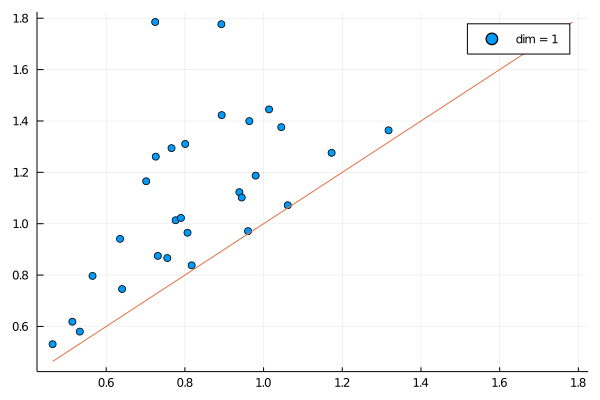

In [92]:
plotpersistencediagram(th_res,1)

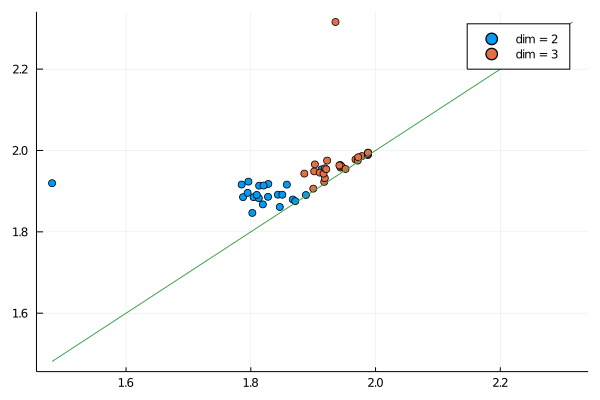

In [88]:
plotpersistencediagram(th_res,2:3)

Сгенерируем точки из набора несвязных сфер разных размерностей.

In [15]:
spheres1(cnt) = hcat([sphere(1) for i=1:cnt]...)
spheres2(cnt) = [hcat([sphere(2) for i=1:cnt]...) [spheres1(cnt) .+ 3; zeros(1, cnt)]]
spheres3(cnt) = [hcat([sphere(3) for i=1:cnt]...) [spheres2(cnt) .+ 3; zeros(1, cnt * 2)]]
spheres4(cnt) = [hcat([sphere(4) for i=1:cnt]...) [spheres3(cnt) .+ 3; zeros(1, cnt * 3)]]
spheres5(cnt) = [hcat([sphere(5) for i=1:cnt]...) [spheres4(cnt) .+ 3; zeros(1, cnt * 4)]]

spheres5 (generic function with 1 method)

К сожалению, с такой генерацией точек не получилось найти гомологии больших размерностей, так как нужно брать много точек, но тогда будет слишком много симплексов и считается все очень долго съедает всю память.

In [16]:
spheres_pts = spheres3(100)
spheres_res = eirene(spheres_pts, model = "pc", maxdim=2)

Dict{String,Any} with 12 entries:
  "symmat"   => [15751 15713 … 0 0; 15713 15751 … 0 0; … ; 0 0 … 15751 15451; 0…
  "maxnz"    => [0, 11379, 685841, 23131006, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  292, 293, 294, 295, 296, 29…
  "cyclerep" => [Array{Int64,1}[], [[1, 2], [1, 4], [22, 21], [22, 20], [82, 83…
  "phi"      => [Int64[], [1, 226, 4490, 4251, 13897, 3404, 2941, 2050, 1820, 2…
  "plo"      => [Int64[], [2, 4, 21, 20, 83, 16, 14, 10, 9, 13  …  206, 141, 22…
  "ocg2rad"  => [4.41219, 4.41183, 4.41107, 4.41039, 4.40936, 4.40925, 4.40882,…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  291, 292, 293, 294, 295, 29…
  "nvl2ovl"  => [170, 196, 184, 155, 127, 144, 160, 183, 134, 199  …  36, 7, 1,…
  "input"    => Dict{String,Any}("genera"=>[-0.564259 0.584378 … 5.0 5.0; -0.76…
  "tid"      => [Int64[], [2, 4, 21, 20, 83, 16, 14, 10, 9, 13  …  141, 22, 132…
  "grain"    => [[15751, 15751, 15751, 15751, 15751, 15751, 15751, 15751, 15751…

Здесь явно выделяется один класс, что и ожидалось

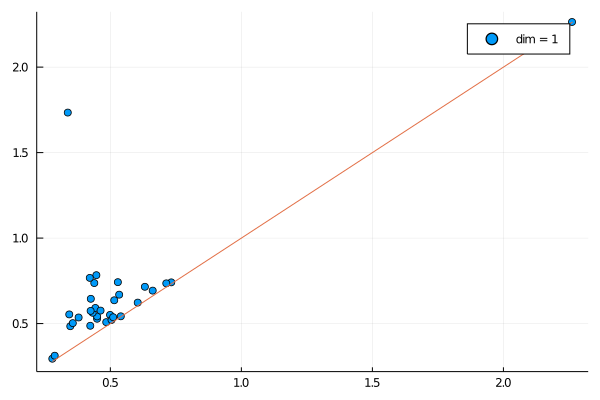

In [69]:
plotpersistencediagram(spheres_res,1)

И для двухмерных тоже

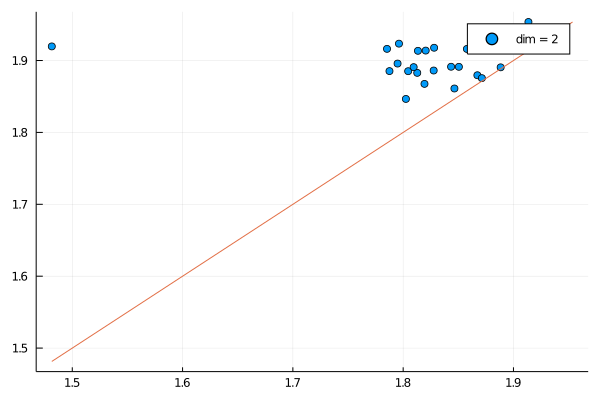

In [70]:
plotpersistencediagram(th_res,2)

Со сферами возникает проблема, что если брать точки случайно, то чтобы хорошо приблизить многомерую сферу, нужно брать много точек.
При малом количестве точек не получается найти гомологии для больших размерностей. Поэтому хочется брать точки каким-то специальным образом,
чтобы расстояние между точками было хотя бы какое-то $d$ и чтобы они были равномерно размазаны по сфере.
Хорошим приближением могли бы быть вершины куба, но, к сожалению, в таком случае дырки сильно быстро зарастают, и не получается ничего увидеть.
Например, если взять трехмерный куб, то в момент, когда у него появляются грани, он уже весь зарастает внутри.
Чтобы избежать этого, можно взять еще по точке в середине каждой грани и посмотреть что получится.

In [20]:
function gen_cube(d)
    all_pts = reduce(hcat, [vcat(x...) for x = Iterators.product(Iterators.repeated((-1, 1), d)...)])
    on_faces = reduce(hcat, [[one_hot(d, i) for i = 1:d] [one_hot(d, i) * -1 for i = 1:d]])
    hcat(all_pts, on_faces)
end

function one_hot(d, i)
    v = zeros(d)
    v[i] = 1
    v
end

cubes = hcat([vcat(gen_cube(i) .+ i*100, zeros(6 - i, 2^i + 2*i)) for i=1:6]...) # несвязные кубы размерности до 6

6×168 Array{Float64,2}:
 99.0  101.0  101.0  99.0  199.0  201.0  …  600.0  600.0  600.0  600.0  600.0
  0.0    0.0    0.0   0.0  199.0  199.0     599.0  600.0  600.0  600.0  600.0
  0.0    0.0    0.0   0.0    0.0    0.0     600.0  599.0  600.0  600.0  600.0
  0.0    0.0    0.0   0.0    0.0    0.0     600.0  600.0  599.0  600.0  600.0
  0.0    0.0    0.0   0.0    0.0    0.0     600.0  600.0  600.0  599.0  600.0
  0.0    0.0    0.0   0.0    0.0    0.0  …  600.0  600.0  600.0  600.0  599.0

Здесь мы ограничиваем радиус, так как при большом радиусе мы уже начнем рассматривать точки из разных компонент связности, а максимальное расстояние между точками
из одной компоненты среди сгенерированных $\sqrt{5\cdot 2^6}$. Это позволит значительно сократить число симплексов, но это все равно долго считается.
Заметим, что если взять радиус 3, то все классы гомологий уже успеют умереть (кроме 0, у них останутся жить еще 6 классов, что соответствует 6 компонентам связности).

In [21]:
C = eirene(cubes, model = "pc", maxdim=5, maxrad=3)

Dict{String,Any} with 12 entries:
  "symmat"   => [10 8 … 0 0; 8 10 … 0 0; … ; 0 0 … 10 6; 0 0 … 6 10]
  "maxnz"    => [0, 855, 7035, 42942, 180581, 493361, 1036229, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  160, 161, 162, 163, 164, 16…
  "cyclerep" => [Array{Int64,1}[], [[1, 2], [13, 14], [1, 3], [93, 91], [93, 89…
  "phi"      => [Int64[], [1, 835, 2, 2023, 2017, 2005, 1998, 1983, 1969, 1949 …
  "plo"      => [Int64[], [2, 14, 3, 91, 89, 87, 85, 83, 81, 79  …  9, 8, 1, 15…
  "ocg2rad"  => [3.0, 2.82843, 2.64575, 2.44949, 2.23607, 2.0, 1.73205, 1.41421…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  159, 160, 161, 162, 163, 16…
  "nvl2ovl"  => [157, 158, 159, 160, 161, 162, 163, 164, 165, 166  …  11, 12, 5…
  "input"    => Dict{String,Any}("genera"=>[99.0 101.0 … 600.0 600.0; 0.0 0.0 ……
  "tid"      => [Int64[], [2, 14, 3, 91, 89, 87, 85, 83, 81, 79  …  127, 23, 13…
  "grain"    => [[10, 10, 10, 10, 10, 10, 10, 10, 10, 10  …  10, 10, 10, 10, 10…

Здесь видно, что 6 классов остаются жить. Первая координата это время рождения, а вторая -- время смерти. Здесь можно было бы нарисовать баркоды и на баркодах это видно, но этого сделать не получилось. На персистентной диаграме это не увидеть, так как точки будут слипаться, а рисовать баркоды я не стал, так как не понятно как нормально нарисовать статическую картинку, чтобы на ней хоть что-то было видно.

In [78]:
barcode(C, dim=0)

166×2 Array{Float64,2}:
 0.0   1.41421
 0.0   1.41421
 0.0   1.41421
 0.0   2.0
 0.0   2.0
 0.0   2.0
 0.0   2.0
 0.0   2.0
 0.0   2.0
 0.0   2.0
 0.0   2.0
 0.0   2.0
 0.0   2.0
 ⋮    
 0.0   1.0
 0.0   2.0
 0.0   1.41421
 0.0   1.73205
 0.0   2.0
 0.0   1.0
 0.0  Inf
 0.0  Inf
 0.0  Inf
 0.0  Inf
 0.0  Inf
 0.0  Inf

Здесь можно увидеть класс, который соотвествует 2 мерному кубу, остальные классы живут недолго.

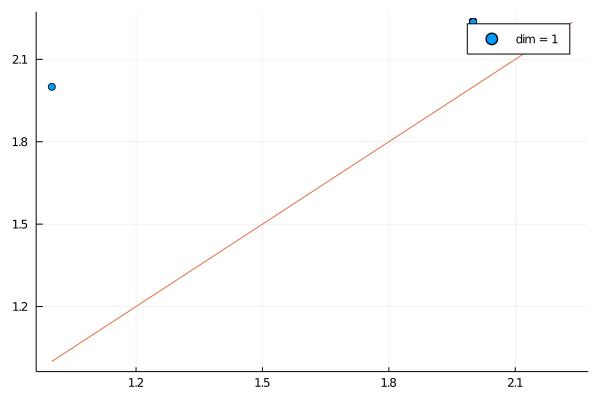

In [90]:
plotpersistencediagram(C,1)

Далее на баркодах видно, что для кажой размерности есть ровно один класс, что и ожидалось.

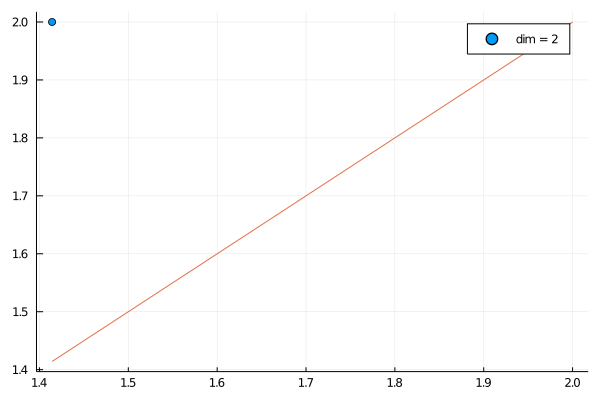

In [72]:
plotpersistencediagram(C, 2)

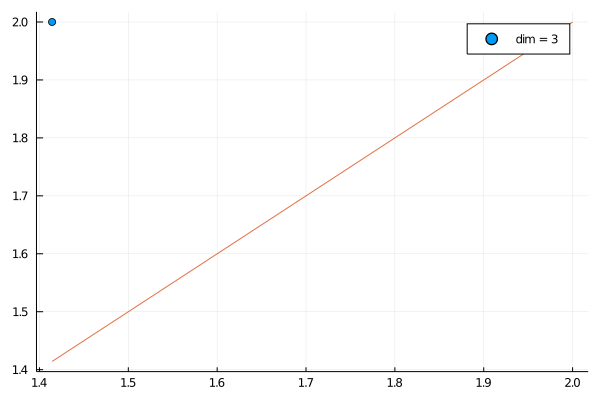

In [73]:
plotpersistencediagram(C,3)

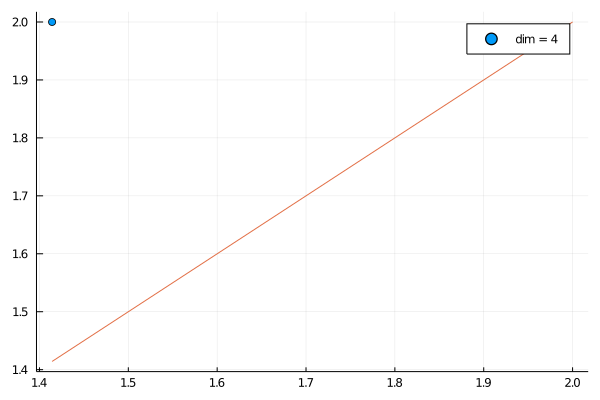

In [74]:
plotpersistencediagram(C,4)

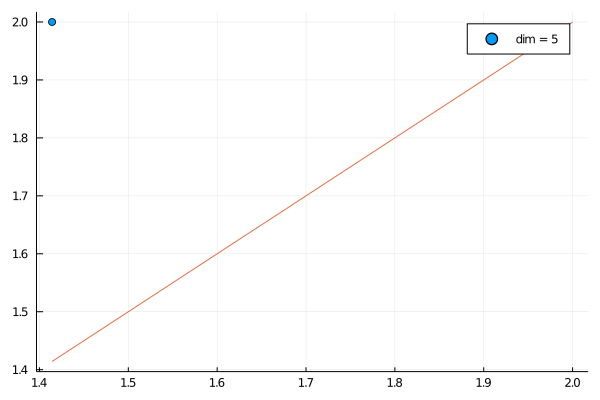

In [75]:
plotpersistencediagram(C,5)